# Neighbor meshes in three dimensions
The neighbor meshes we worked with in this chapter in general also work in three dimensions. It is just more challenging to visualize those.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

The image data we use here shows a crop of a developing Tribolium castaneum embryo imaged using light sheet microscopy by Daniela Vorkel, Myers lab, MPI-CBG / CSBD Dresden.

In [2]:
raw_image = imread("../../data/Lund_000500_resampled-cropped.tif")

raw_image.shape

(100, 256, 256)

For the ease-of-use we write a short function for visualizing our image stack in three maximum projections from different persepctives.

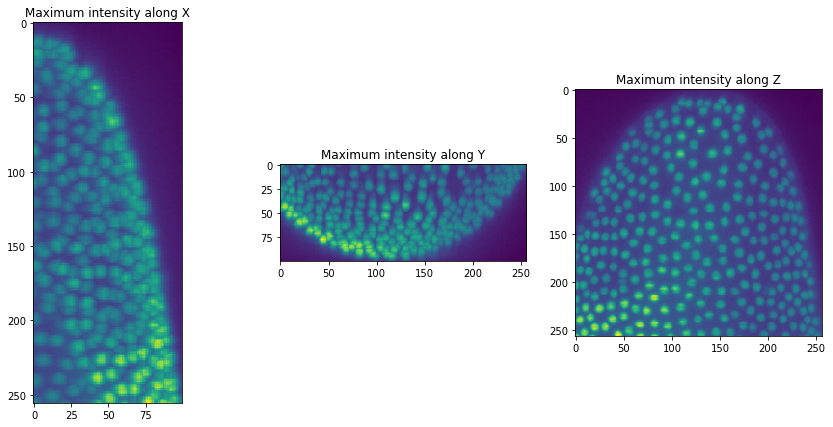

In [3]:
def orthogonal_show(image, labels=False):

    fig, axs = plt.subplots(1, 3, figsize=(15, 7))

    cle.imshow(cle.maximum_x_projection(image), plot=axs[0], labels=labels)
    cle.imshow(cle.maximum_y_projection(image), plot=axs[1], labels=labels)
    cle.imshow(cle.maximum_z_projection(image), plot=axs[2], labels=labels)
    
    axs[0].set_title("Maximum intensity along X")
    axs[1].set_title("Maximum intensity along Y")
    axs[2].set_title("Maximum intensity along Z")

orthogonal_show(raw_image)

We can now segment nuclei in our our dataset.

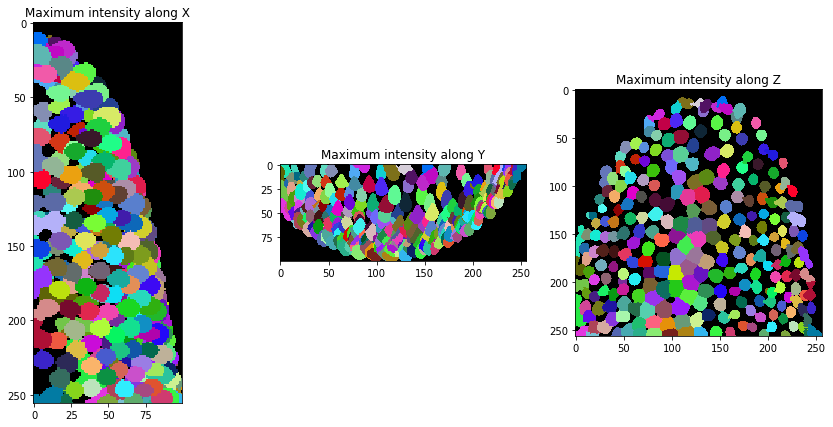

In [4]:
background_subtracted = cle.top_hat_box(raw_image, radius_x=5, radius_y=5, radius_z=5)

nuclei = cle.voronoi_otsu_labeling(background_subtracted)

orthogonal_show(nuclei, labels=True)

After segmentation, we expand the labels a bit so they touch.

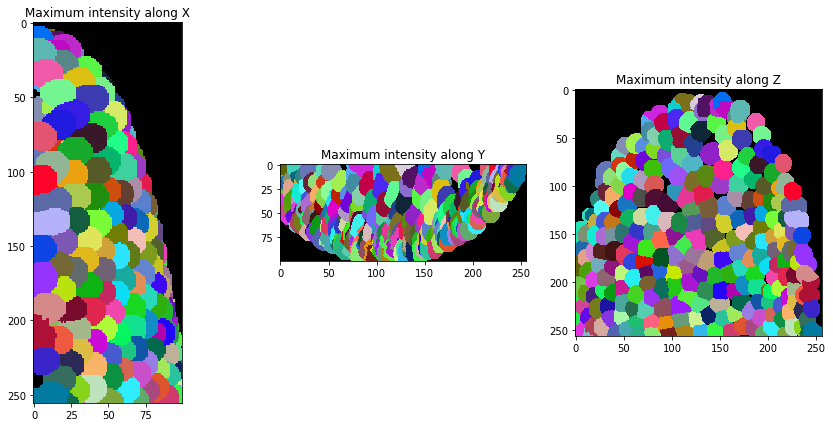

In [5]:
expanded_nuclei = cle.dilate_labels(nuclei, radius=4)

orthogonal_show(expanded_nuclei, labels=True)

And then, we can visualize a (centroid) distance mesh between touching neighbors.

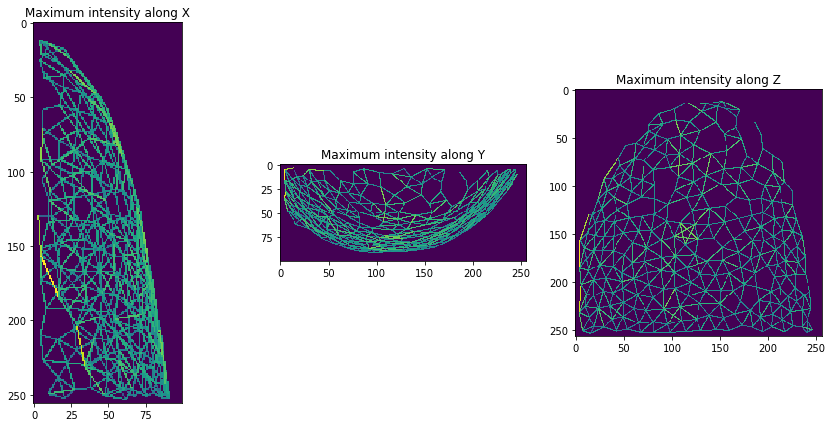

In [6]:
mesh = cle.draw_distance_mesh_between_touching_labels(expanded_nuclei)

orthogonal_show(mesh)